EDA (Exploratory Data Analysis)
Luego de finalizar el proceso de Extracción, Transformación y Carga (ETL) y crear los nuevos archivos consolidados, nos sumergimos en la fase de Análisis Exploratorio de Datos (EDA). En esta etapa, nos introducimos  en la información detallada de los eventos desafortunados que buscamos comprender en profundidad. En el EDA, nuestro objetivo es comprender la estructura de estos conjuntos de datos, abordar cualquier valor atípico, identificar duplicados y gestionar los valores faltantes, La finalidad de este análisis reside en su capacidad para revelar patrones, tendencias y relaciones entre las diferentes variables presentes en los datos.

A través de este proceso, buscamos extraer información valiosa que pueda orientar futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires, Argentina. 

Diccionario de datos
Id_Siniestro: Un número único que identifica de manera exclusiva cada incidente vial.
Nro_Victimas: La cantidad de personas afectadas o involucradas en el siniestro vial.
Fecha: La fecha en la que ocurrió el siniestro vial.
Franja_Hora: El período de tiempo específico durante el cual tuvo lugar el siniestro.
Tipo_Calle: La categoría que describe el tipo de calle donde ocurrió el siniestro (por ejemplo, avenida, calle, autopista).
Comuna: La subdivisión geográfica de la ciudad donde se produjo el siniestro vial.
Longitud: La ubicación geográfica medida en términos de longitud.
Latitud: La ubicación geográfica medida en términos de latitud.
Victima: El tipo de vehículo que fue víctima en el siniestro vial.
Acusado: El tipo de vehículo señalado como responsable en el siniestro vial.
Rol: La función o posición específica de una persona en relación con el siniestro vial (puede incluir roles como conductor, peatón, pasajero, etc.).
Sexo: El género de las personas involucradas en el siniestro vial.
Edad: La edad de las personas involucradas en el siniestro vial.

In [76]:
# Importar librearias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import folium
from IPython.display import Image

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

In [77]:
# Carga y visualización de datos 
df_homicidios = pd.read_csv('homicidios_new.csv')
df_homicidios.head(3)

,Id_Siniestro,Nro_Victimas,Fecha,Franja_Hora,Tipo_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,4.0,Avenida,8,-58.475340,-34.687570,Moto,Auto,Conductor,Masculino,19.0
1,2016-0002,1,2016-01-02,1.0,Gral Paz,9,-58.508775,-34.669777,Auto,Pasajeros,Conductor,Masculino,70.0
2,2016-0003,1,2016-01-03,7.0,Avenida,1,-58.390403,-34.631894,Moto,Auto,Conductor,Masculino,30.0


In [78]:
# información general del Dataframe Homicidios
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id_Siniestro  717 non-null    object 
 1   Nro_Victimas  717 non-null    int64  
 2   Fecha         717 non-null    object 
 3   Franja_Hora   716 non-null    float64
 4   Tipo_Calle    717 non-null    object 
 5   Comuna        717 non-null    int64  
 6   Longitud      717 non-null    float64
 7   Latitud       717 non-null    float64
 8   Victima       708 non-null    object 
 9   Acusado       694 non-null    object 
 10  Rol           706 non-null    object 
 11  Sexo          711 non-null    object 
 12  Edad          664 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 72.9+ KB


In [79]:
df_homicidios.shape

(717, 13)

In [80]:
# Convertimos la columna 'Fecha' a tipo datetime y extraemos el año y el mes para futuros analisis 
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Crear nuevas columnas: Año, Mes
df_homicidios['Año'] = df_homicidios['Fecha'].dt.year
df_homicidios['Mes'] = df_homicidios['Fecha'].dt.month
df_homicidios['Semestre'] = df_homicidios['Fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

In [81]:
# Convertir la columna Franja_Hora a tipo númerico
df_homicidios['Franja_Hora'] = pd.to_numeric(df_homicidios['Franja_Hora'])

In [82]:
# Validación de valores nulos y duplicados
# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos_homicidios = (df_homicidios.isnull().mean() * 100).round(2)
print(porcentaje_nulos_homicidios)

Id_Siniestro    0.00
Nro_Victimas    0.00
Fecha           0.00
Franja_Hora     0.14
Tipo_Calle      0.00
Comuna          0.00
Longitud        0.00
Latitud         0.00
Victima         1.26
Acusado         3.21
Rol             1.53
Sexo            0.84
Edad            7.39
Año             0.00
Mes             0.00
Semestre        0.00
dtype: float64


Al comprobar si hay datos faltantes en el conjunto de datos, se observa que hay muy pocos valores nulos. Por lo tanto, para hacer un análisis adecuado y prevenir distorsiones, se ha decidido usar toda la información como importante, sin descartar ningún dato.

In [83]:
# Buscamos filas con valores duplicados
duplicados = df_homicidios[df_homicidios.duplicated()] 
duplicados
# No hay valores duplicados

,Id_Siniestro,Nro_Victimas,Fecha,Franja_Hora,Tipo_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rol,Sexo,Edad,Año,Mes,Semestre


Estadísticas Descriptivas

In [84]:
print("\n\033[1mEstadísticas Victimas Fatales:\033[0m")
df_homicidios[['Nro_Victimas', 'Franja_Hora', 'Edad', 'Longitud', 'Latitud']].describe()


Estadísticas Victimas Fatales:


,Nro_Victimas,Franja_Hora,Edad,Longitud,Latitud
count,717.000000,716.000000,664.000000,717.000000,717.000000
mean,1.061367,11.554469,42.167169,-58.441475,-34.619560
std,0.257024,6.700055,19.788034,0.046432,0.035373
min,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,6.000000,27.000000,-58.476337,-34.643670
50%,1.000000,11.000000,37.000000,-58.444513,-34.622882
75%,1.000000,17.000000,56.250000,-58.401841,-34.596948
max,3.000000,23.000000,95.000000,-58.352470,-34.534654


In [85]:
''' Analisis de estadisticas.
Nro_Victimas (Número de Víctimas):El número promedio de víctimas por cada siniestro es cerca de 1.06. En la mayor parte de los siniestros solo hay una víctima y hay pocos siniestros con hasta 3 víctimas.
Franja_Hora (Franja Horaria): La mayoria de los siniestros se presentan en las horas de la mañana, tipo 11:55 a.m 
Edad: El promedio de edad de las víctimas en los siniestros es 42 años, la mayor parte de las víctimas tienen entre 27 y 56 años y la edad más baja es 1 año y la más alta es 95 años
Longitud y Latitud:
'''

' Analisis de estadisticas.\nNro_Victimas (Número de Víctimas):El número promedio de víctimas por cada siniestro es cerca de 1.06. En la mayor parte de los siniestros solo hay una víctima y hay pocos siniestros con hasta 3 víctimas.\nFranja_Hora (Franja Horaria): La mayoria de los siniestros se presentan en las horas de la mañana, tipo 11:55 a.m \nEdad: El promedio de edad de las víctimas en los siniestros es 42 años, la mayor parte de las víctimas tienen entre 27 y 56 años y la edad más baja es 1 año y la más alta es 95 años\nLongitud y Latitud:\n'

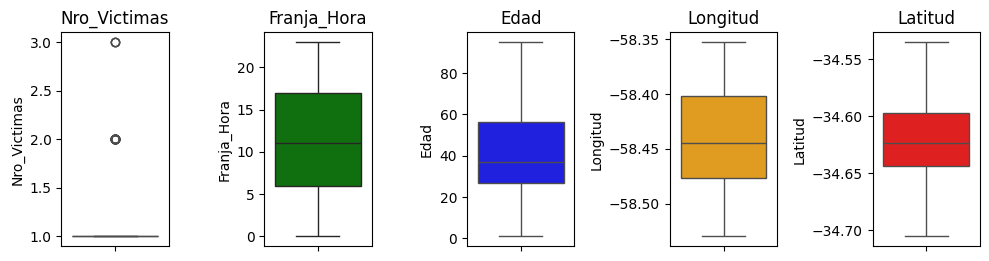

In [86]:
#Graficamos outliers
columnas = ['Nro_Victimas','Franja_Hora','Edad','Longitud','Latitud']
colores = ['red', 'green', 'blue', 'orange', 'red']

plt.figure(figsize=(10, 5))

for i, column in enumerate(columnas):
    plt.subplot(2, 5, i+1)  
    sns.boxplot(y=df_homicidios[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

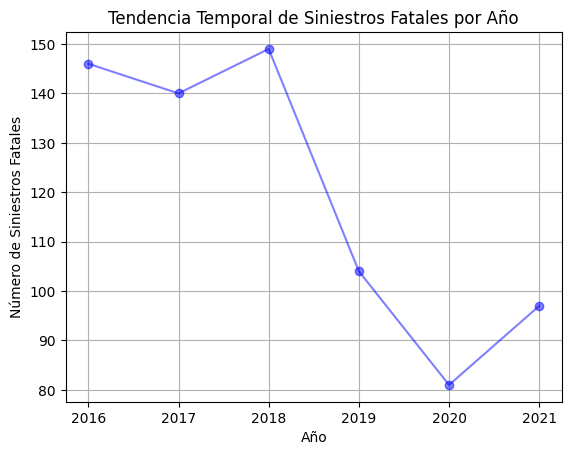

In [87]:
# Crear un gráfico de líneas para la frecuencia de fallecidos por año
# Agrupar por año y contar el número de siniestros en cada año
siniestros_por_año = df_homicidios.groupby(df_homicidios['Año']).size()

plt.plot(siniestros_por_año.index, siniestros_por_año, label='Año', marker='o', alpha=0.5, color='blue')
plt.title('Tendencia Temporal de Siniestros Fatales por Año')
plt.xlabel('Año')
plt.ylabel('Número de Siniestros Fatales')
plt.grid(True)


In [88]:
print("\n\033[1mCantidad de fallecidos por año:\033[0m")
# Realizamos un conteo de siniestros por año
siniestros_por_año = df_homicidios['Año'].value_counts().sort_index(ascending=True)
siniestros_por_año


Cantidad de fallecidos por año:


Año
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: count, dtype: int64

In [89]:
'''Analisis frecuencia de fallecidos por año
Se analizaron los siniestros en el periodo 2016-2021; como podemos observar el año de mayor incidentes fue el 2018. 
En adelante y hasta el año 2020 se presento una baja significativa en el número de siniestros. 
para el año 2021 la tendecia fue nuevamente al alza, y esto puede corelacionarse con la pandemia del SAR-COV2.
no obstante las cifras del ultimo año no superaron el pico presentado en el año con mayor número de incidentes.
'''

'Analisis frecuencia de fallecidos por año\nSe analizaron los siniestros en el periodo 2016-2021; como podemos observar el año de mayor incidentes fue el 2018. \nEn adelante y hasta el año 2020 se presento una baja significativa en el número de siniestros. \npara el año 2021 la tendecia fue nuevamente al alza, y esto puede corelacionarse con la pandemia del SAR-COV2.\nno obstante las cifras del ultimo año no superaron el pico presentado en el año con mayor número de incidentes.\n'

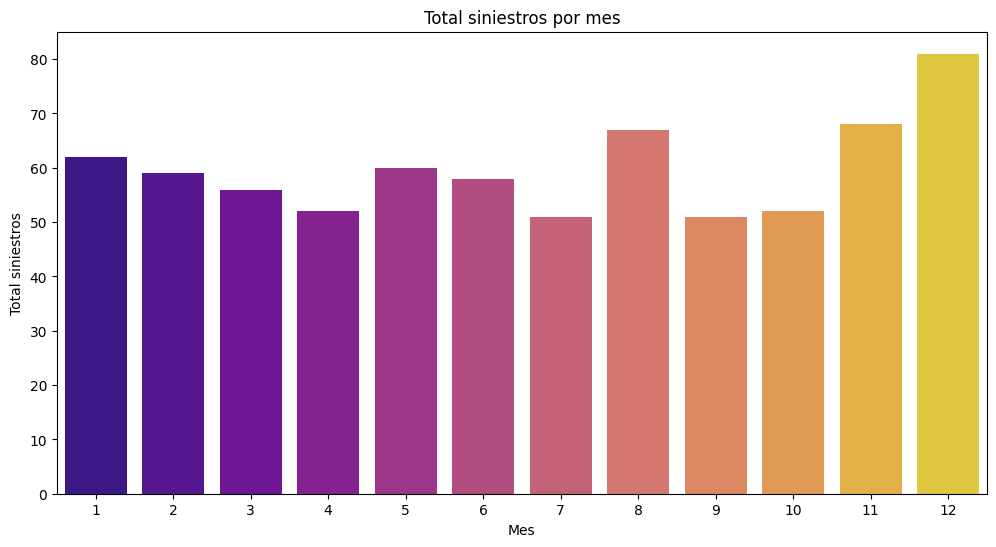

In [90]:
# Se cuenta el numero de siniestros por mes y se ordenan los meses 
siniestros_por_mes = df_homicidios['Mes'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=siniestros_por_mes.index, y=siniestros_por_mes.values, palette='plasma')
plt.xticks(rotation=0)
plt.xlabel('Mes')
plt.ylabel('Total siniestros')
plt.title('Total siniestros por mes')
plt.show()

In [91]:
print("\n\033[1mCantidad de fallecidos por mes:\033[0m")
# Realizamos un conteo de siniestros por año
siniestros_mes = df_homicidios['Mes'].value_counts().sort_index(ascending=True)
siniestros_mes


Cantidad de fallecidos por mes:


Mes
1     62
2     59
3     56
4     52
5     60
6     58
7     51
8     67
9     51
10    52
11    68
12    81
Name: count, dtype: int64

In [92]:
''' Analisis de siniestros por mes:
Como podemos observar en la gráfica y los datos analizados, se destaca que los meses con la mayor cantidad de siniestros son Agosto con 67, Noviembre con 68 y Diciembre con 81. 
Sin embargo, es importante señalar que la diferencia con respecto a los demás meses no es significativa. 
Esto sugiere que, aunque estos meses específicos tienen una frecuencia relativamente mayor, la distribución de siniestros a lo largo del año tiende a ser bastante uniforme.
'''

' Analisis de siniestros por mes:\nComo podemos observar en la gráfica y los datos analizados, se destaca que los meses con la mayor cantidad de siniestros son Agosto con 67, Noviembre con 68 y Diciembre con 81. \nSin embargo, es importante señalar que la diferencia con respecto a los demás meses no es significativa. \nEsto sugiere que, aunque estos meses específicos tienen una frecuencia relativamente mayor, la distribución de siniestros a lo largo del año tiende a ser bastante uniforme.\n'

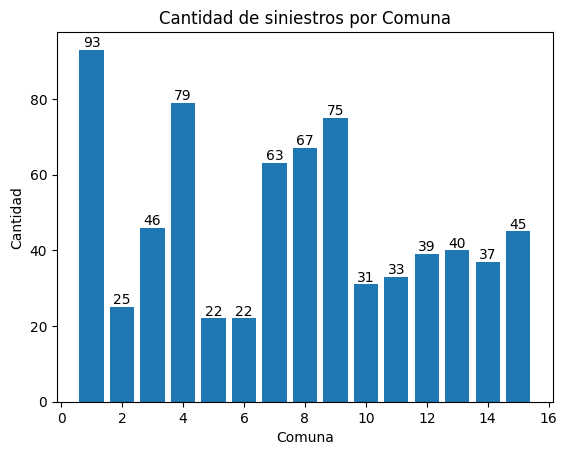

In [93]:
#Cantidad de siniestros por comuna

cant_por_comuna = df_homicidios['Comuna'].value_counts()

fig, ax = plt.subplots()
barras = ax.bar(cant_por_comuna.index, cant_por_comuna.values)
ax.set_title('Cantidad de siniestros por Comuna')
ax.set_xlabel('Comuna')
ax.set_ylabel('Cantidad')
plt.xticks(rotation=0)

for bar in barras:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')

plt.show()

In [94]:
'''Analisis cantidad de siniestros por comuna :
Como podemos observar en la gráfica, se destaca que las comunas con mayor cantidad de siniestros son comuna 9 con 75, comuna 4 con 79 y comuna 1 con 93.'''

'Analisis cantidad de siniestros por comuna :\nComo podemos observar en la gráfica, se destaca que las comunas con mayor cantidad de siniestros son comuna 9 con 75, comuna 4 con 79 y comuna 1 con 93.'

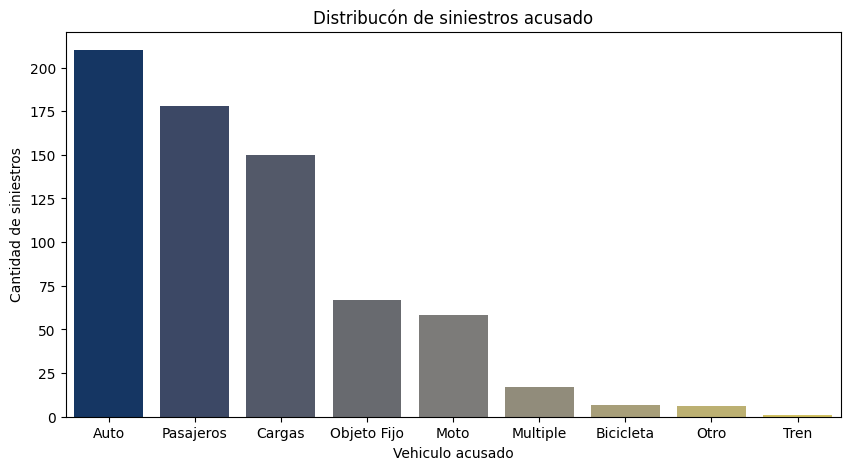

In [95]:
#cantidad de siniestros segun tipo de acusado
tipo_ac = df_homicidios['Acusado'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(10, 5))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, palette='cividis')
plt.xticks(rotation=45)

plt.xlabel('Vehiculo acusado')
plt.ylabel('Cantidad de siniestros')
plt.title('Distribucón de siniestros acusado')
plt.xticks(rotation=0)

plt.show()

In [96]:
print("\n\033[1mCantidad de siniestros por acusado:\033[0m")
# Realizamos un conteo de siniestros por año
siniestros_acusado = df_homicidios['Acusado'].value_counts().sort_index(ascending=True)
siniestros_acusado


Cantidad de siniestros por acusado:


Acusado
Auto           210
Bicicleta        7
Cargas         150
Moto            58
Multiple        17
Objeto Fijo     67
Otro             6
Pasajeros      178
Tren             1
Name: count, dtype: int64

In [97]:
'''Analisis cantidad de siniestros por vehiculo acusado:
En la gráfica, se destaca que hay un top 3 Auto, Pasajeros y Cargas que más siniestros han causado a lo largo del peridodo analizado.'''

'Analisis cantidad de siniestros por vehiculo acusado:\nEn la gráfica, se destaca que hay un top 3 Auto, Pasajeros y Cargas que más siniestros han causado a lo largo del peridodo analizado.'

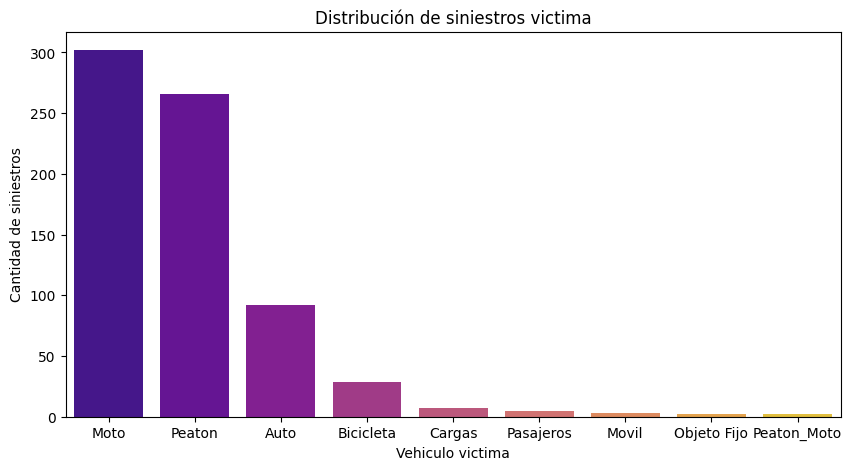

In [98]:
#cantidad de siniestros segun tipo de victima
tipo_ac = df_homicidios['Victima'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(10, 5))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, palette='plasma')
plt.xticks(rotation=45)

plt.xlabel('Vehiculo victima')
plt.ylabel('Cantidad de siniestros')
plt.title('Distribución de siniestros victima')
plt.xticks(rotation=0)

plt.show()

In [99]:
print("\n\033[1mCantidad de siniestros por victima:\033[0m")
# Realizamos un conteo de siniestros por año
siniestros_victima = df_homicidios['Victima'].value_counts().sort_index(ascending=True)
siniestros_victima


Cantidad de siniestros por victima:


Victima
Auto            92
Bicicleta       29
Cargas           7
Moto           302
Movil            3
Objeto Fijo      2
Pasajeros        5
Peaton         266
Peaton_Moto      2
Name: count, dtype: int64

In [100]:
'''Analisis cantidad de siniestros por vehiculo victima:
La gráfica muestra que las motos tienen el mayor número de siniestros, con una diferencia notable sobre los demás vehículos. 
Los peatones son los que le siguen en cantidad de siniestros.'''

'Analisis cantidad de siniestros por vehiculo victima:\nLa gráfica muestra que las motos tienen el mayor número de siniestros, con una diferencia notable sobre los demás vehículos. \nLos peatones son los que le siguen en cantidad de siniestros.'

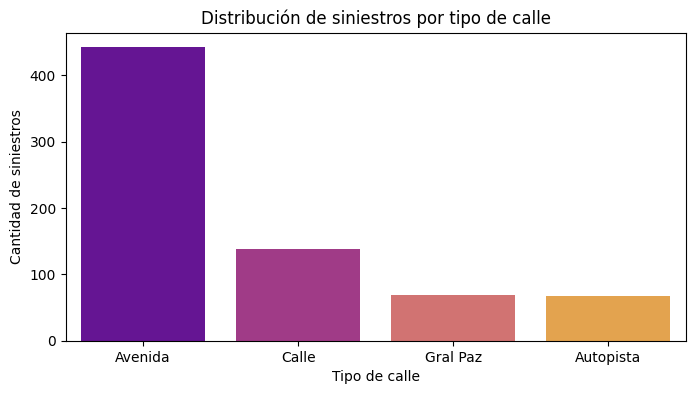

In [101]:
# Obtener la cantidad de siniestros por tipo de calle
tipo_ac = df_homicidios['Tipo_Calle'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(8, 4))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, palette='plasma')
plt.xticks(rotation=45)

plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de siniestros')
plt.title('Distribución de siniestros por tipo de calle')
plt.xticks(rotation=0)

plt.show()

In [102]:
'''Analisis siniestros por tipo de calle:
La gráfica muestra las avenidas tienen el mayor número de siniestros, con una diferencia notable sobre el resto.'''

'Analisis siniestros por tipo de calle:\nLa gráfica muestra las avenidas tienen el mayor número de siniestros, con una diferencia notable sobre el resto.'

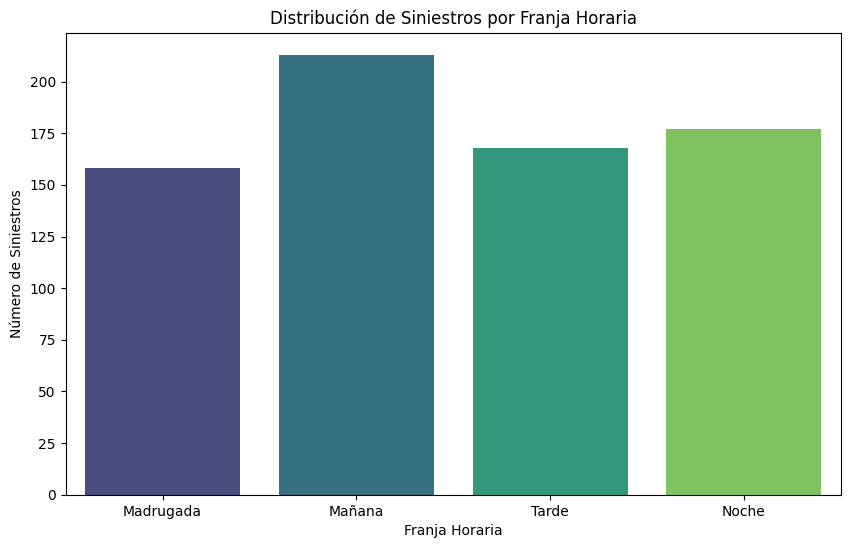

In [103]:
# Siniestros por franja horaria, se dividirán las horas en tres categorías para facilitar el cálculo
'''
   Madrugada (0-5)
   Mañana    (6-12)
   Tarde     (13-18)
   Noche     (19-23) 
'''

bins = [0, 6, 12, 18, 24]
labels = ['Madrugada','Mañana', 'Tarde', 'Noche']

# Aplicar la transformación a 'Franja_Hora'
df_homicidios['Franja_Hora'] = pd.cut(df_homicidios['Franja_Hora'], bins=bins, labels=labels, right=False)

# Conteo de siniestros por franja horaria
conteo_franja_hora = df_homicidios['Franja_Hora'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_franja_hora.index, y=conteo_franja_hora.values, palette='viridis')
plt.title('Distribución de Siniestros por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Siniestros')
plt.show()


In [104]:
'''Analisis siniestros por franja horaria:
La gráfica muestra que en las horas de la mañana se presentan el mayor número de siniestros, con una diferencia no muy significativa al resto del día.'''

'Analisis siniestros por franja horaria:\nLa gráfica muestra que en las horas de la mañana se presentan el mayor número de siniestros, con una diferencia no muy significativa al resto del día.'

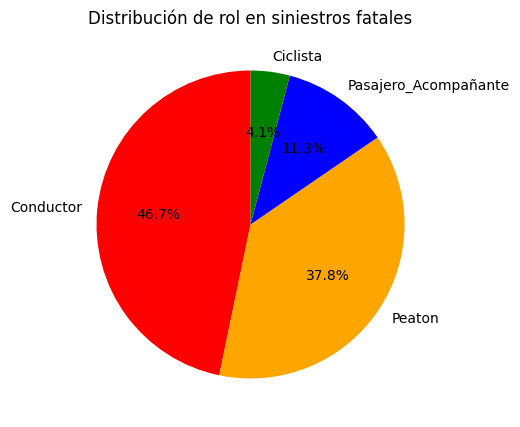

In [105]:
# Contar la frecuencia de cada valor en la columna 'Rol'
conteo_rol = df_homicidios['Rol'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(conteo_rol, labels=conteo_rol.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'blue', 'green'])
plt.title('Distribución de rol en siniestros fatales')
plt.show()

In [106]:
'''Analisis de siniestros fatales por rol:
En esta grafica se puede ver que los conductores son las personas que tiene mas probabilidad de fallecer, como segundo lugar estan los peatones'''

'Analisis de siniestros fatales por rol:\nEn esta grafica se puede ver que los conductores son las personas que tiene mas probabilidad de fallecer, como segundo lugar estan los peatones'

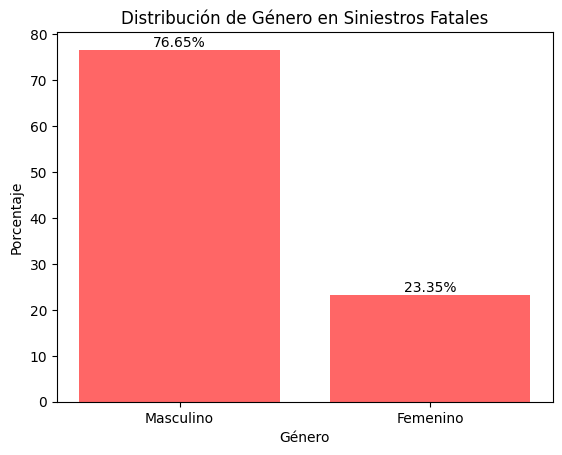

In [107]:
# Contar la frecuencia de cada género en siniestros fatales
siniestros_genero = df_homicidios['Sexo'].value_counts()
# Calcular los porcentajes
porcentaje_genero = (siniestros_genero / siniestros_genero.sum()) * 100

# Gráfico para siniestros fatales por género

bars1 = plt.bar(porcentaje_genero.index, porcentaje_genero, color='red', alpha=0.6)
plt.title('Distribución de Género en Siniestros Fatales')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

In [108]:
'''Analisis de siniestros fatales por genero:
En esta grafica se puede ver que los hombres son las personas que tiene mas probabilidad de fallecer con un porcentaje bastente alto, con respecto a las mujeres.'''

'Analisis de siniestros fatales por genero:\nEn esta grafica se puede ver que los hombres son las personas que tiene mas probabilidad de fallecer con un porcentaje bastente alto, con respecto a las mujeres.'

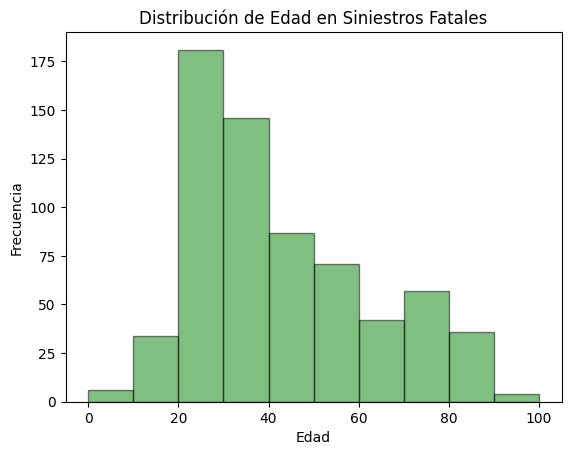

In [109]:
# Gráfico para siniestros fatales por edad
bins_fatal = range(0, 101, 10) 
plt.hist(df_homicidios['Edad'], bins=bins_fatal, color='green', alpha=0.5, edgecolor='black')
plt.title('Distribución de Edad en Siniestros Fatales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [110]:
'''Analisis de siniestros fatales por edades:

"El análisis revela que las personas con edades comprendidas entre los 20 y 40 años presentan una mayor probabilidad de fallecer en siniestros viales en comparación con otras franjas etarias. 
Este patrón podría estar relacionado con la actividad diaria de este grupo demográfico.'''

'Analisis de siniestros fatales por edades:\n\n"El análisis revela que las personas con edades comprendidas entre los 20 y 40 años presentan una mayor probabilidad de fallecer en siniestros viales en comparación con otras franjas etarias. \nEste patrón podría estar relacionado con la actividad diaria de este grupo demográfico.'

In [111]:
df_homicidios

,Id_Siniestro,Nro_Victimas,Fecha,Franja_Hora,Tipo_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rol,Sexo,Edad,Año,Mes,Semestre
0,2016-0001,1,2016-01-01,Madrugada,Avenida,8,-58.475340,-34.687570,Moto,Auto,Conductor,Masculino,19.0,2016,1,1
1,2016-0002,1,2016-01-02,Madrugada,Gral Paz,9,-58.508775,-34.669777,Auto,Pasajeros,Conductor,Masculino,70.0,2016,1,1
2,2016-0003,1,2016-01-03,Mañana,Avenida,1,-58.390403,-34.631894,Moto,Auto,Conductor,Masculino,30.0,2016,1,1
3,2016-0004,1,2016-01-10,Madrugada,Avenida,8,-58.465039,-34.680930,Moto,NaN,Conductor,Masculino,18.0,2016,1,1
4,2016-0005,1,2016-01-21,Madrugada,Avenida,1,-58.387183,-34.622466,Moto,Pasajeros,Conductor,Masculino,29.0,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,Tarde,Avenida,7,-58.433538,-34.645616,Moto,Auto,Pasajero_Acompañante,Femenino,18.0,2021,12,2
713,2021-0094,1,2021-12-20,Madrugada,Autopista,9,-58.467398,-34.651178,Moto,Auto,Pasajero_Acompañante,Femenino,43.0,2021,12,2
714,2021-0095,1,2021-12-30,Madrugada,Avenida,11,-58.472934,-34.619847,Moto,Cargas,Conductor,Masculino,27.0,2021,12,2
715,2021-0096,1,2021-12-15,Mañana,Avenida,9,-58.470668,-34.650217,Auto,Cargas,Conductor,Masculino,60.0,2021,12,2


In [112]:
# Se guardan los datos limpieos en CSV
df_homicidios.to_csv('homicidios_final.csv', index=False)